

# Project: Investigate a Dataset (tmdb movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
questions we aim to analyze are :
* What are the most favourite and popular genres
* what are the factors that affect revenues
* what happend to movies durations
* how average votes changed over years 
* Which genres are most popular from year to year



In [1]:
# import pacakages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




<a id='wrangling'></a>
## Data Wrangling





In [2]:
#import data
df=pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# how many columns and rows
print(df.shape)


(10866, 21)


In [4]:
#information about data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

some columns contain null values such as homepage and tagline , we do not have any problems with data types

In [5]:
#calculate summary statistics for the whole data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


budget and revenue columns has many zero values affecting the quartiles values while, the mean of budget is 14 million and the average revenue is 39 million.

average run time or movie duration is 102 minute 
average rating is 5.9


In [6]:
#how many unique value at each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

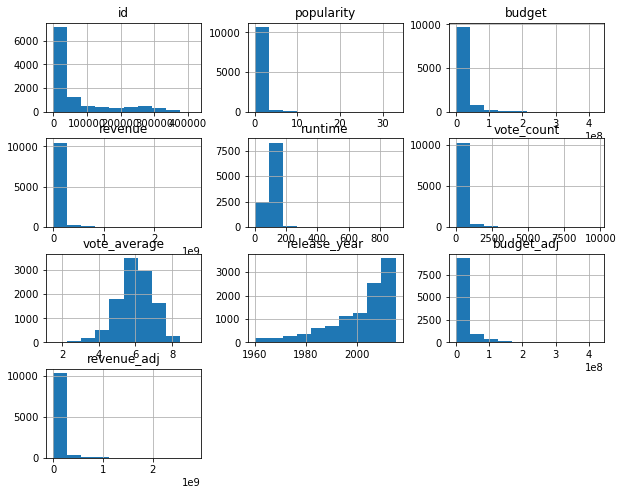

In [7]:
# how our data is distributed
df.hist(figsize=(10,8));


popularity,revenue,vote_count and budget columns are skewed to the right while vote_average is skewed to the left which mean most of votes were around the mean or higher.
release_year shows that most movies in the dataset were produced in the 2000's




### Data Cleaning (drop and remove null values)

In [8]:
#drop columns with many null values and irrelevant to our analysis
df.drop(['id','imdb_id','homepage','tagline','overview'],axis=1,inplace=True)

In [9]:
#drop null rows
df.dropna(inplace=True)

In [10]:
# replace zeros with null values to drop later
#this function replace zeros with null values and it takes only one argument which is the column name we wish to clean

def removezeros (col_name):
    df[col_name].replace(to_replace = 0, value = np.nan , inplace=True)


removezeros('revenue')
removezeros('budget')


In [11]:
#drop null values again 
df.dropna(inplace=True)
df.shape

(3678, 16)

In [12]:
#split genres column for better analysis
df['genres2']=[a[0] for a in df['genres'].str.split('|') ]


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the factors that affect revenues !)

In [13]:
# what is the most collerated columns
df.corr()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.441212,0.611779,0.212226,0.777558,0.320261,0.181718,0.391912,0.541746
budget,0.441212,1.000000,0.685939,0.259298,0.554658,0.021559,0.280008,0.957811,0.527870
revenue,0.611779,0.685939,1.000000,0.248380,0.753032,0.228862,0.147501,0.654214,0.899503
runtime,0.212226,0.259298,0.248380,1.000000,0.273992,0.357757,-0.114632,0.334765,0.279377
vote_count,0.777558,0.554658,0.753032,0.273992,1.000000,0.391802,0.216702,0.494075,0.651307
vote_average,0.320261,0.021559,0.228862,0.357757,0.391802,1.000000,-0.134544,0.033749,0.269047
release_year,0.181718,0.280008,0.147501,-0.114632,0.216702,-0.134544,1.000000,0.085640,-0.098508
budget_adj,0.391912,0.957811,0.654214,0.334765,0.494075,0.033749,0.085640,1.000000,0.564888
revenue_adj,0.541746,0.527870,0.899503,0.279377,0.651307,0.269047,-0.098508,0.564888,1.000000


revenues is higly correlated with budget, popularity and vote_count 

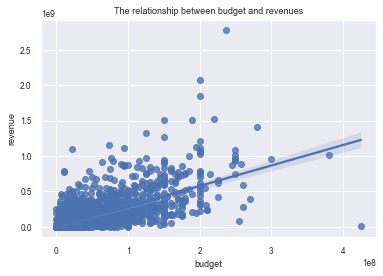

In [29]:
sns.regplot(data=df, x="budget", y="revenue" ).set(title='The relationship between budget and revenues');


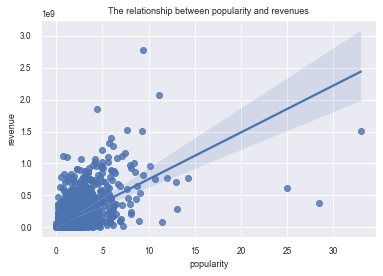

In [30]:
sns.regplot(data=df, x="popularity", y="revenue" ).set(title='The relationship between popularity and revenues');

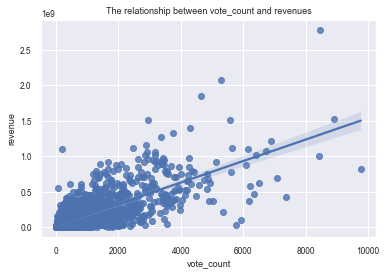

In [31]:
sns.regplot(data=df, x="vote_count", y="revenue" ).set(title='The relationship between vote_count and revenues');

we have positive strong relationship between those columns and revenue

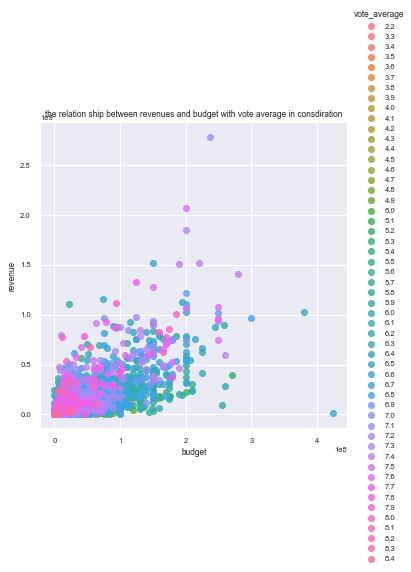

In [59]:
sns.set(font_scale=0.7)

sns.lmplot(data=df,x="budget",y="revenue",hue="vote_average",fit_reg=False).set(title='the relation ship between revenues and budget with vote average in consdiration');


this graph shows that vote average does not affect revenues 
also movies with low budget can have higher average rate than high budget movies  

### Research Question 2  (did movies duration decliane over time?)

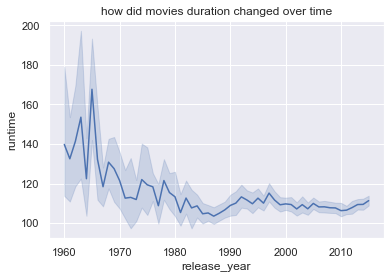

In [43]:
#this code aims to draw a line plot to see how movies duration changed over years
sns.set(font_scale=1)

sns.lineplot(data=df,x='release_year',y='runtime').set(title='how did movies duration changed over time');


this line plot shows decline in movies duration. but it does not tell the whole story there is also increase in the production of short movies and documentries and animation.



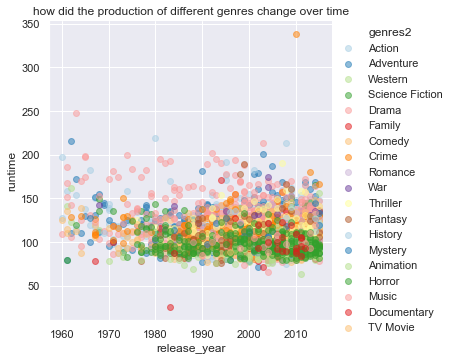

In [44]:
#put genres in consedriation

sns.set()
sns.lmplot(data=df,x="release_year",y="runtime",hue="genres2",fit_reg=False, scatter_kws={'alpha':0.5},palette=("Paired")).set(title='how did the production of different genres change over time');


### Research Question3   (how movies popularity change over time!)

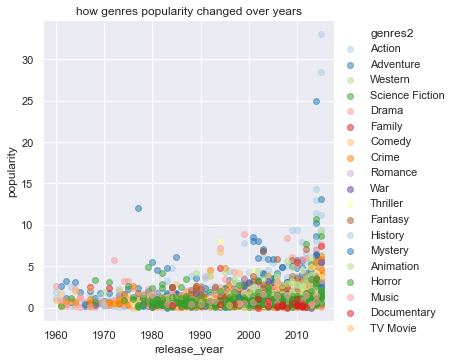

In [20]:
sns.lmplot(data=df,x="release_year",y="popularity",hue="genres2",fit_reg=False,scatter_kws={'alpha':0.5},palette=("Paired")).set(title='how genres popularity changed over years');



Action and adventure movies became very popular over time also horror and animation had
 more audience than before

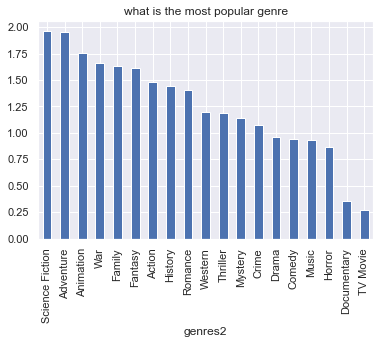

In [46]:
df.groupby('genres2')['popularity'].mean().sort_values(ascending=False).plot(kind='bar',title='what is the most popular genre',y='popularity');


The Most popular genres are Science Fiction and Adventure 

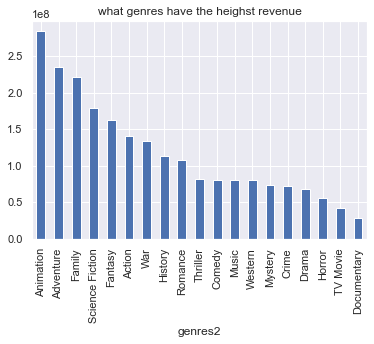

In [47]:
df.groupby('genres2')['revenue'].mean().sort_values(ascending=False).plot(kind='bar',y='revenues',title='what genres have the heighst revenue');

Animation and Adventure have the highest average revenues 

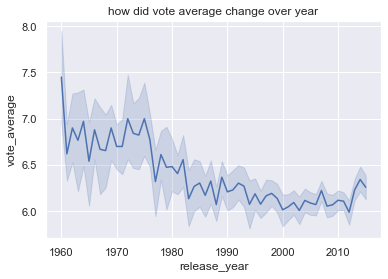

In [48]:
#what happend to vote aveage over years
sns.lineplot(data=df,x='release_year',y='vote_average').set(title='how did vote average change over year');


We can see that vote average has declined over year ; maybe people prefer old movies 

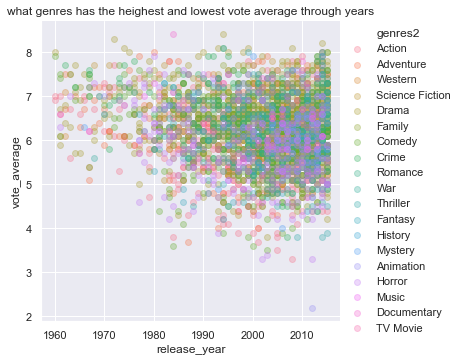

In [49]:
sns.color_palette("Paired")

sns.lmplot(data=df,x="release_year",y="vote_average",hue="genres2",fit_reg=False,scatter_kws={'alpha':0.3}).set(title='what genres has the heighest and lowest vote average through years');


recent movies have lower vote average than old movies 

In [25]:
# first make a list conatin the 17th heighst paid actors and actress
names=['Dwayne Johnson','Daniel Craig','Will Smith','Denzel Washington','Leonardo DiCaprio','Mark Wahlberg','Mark Wahlberg','Julia Roberts','Sandra Bullock','Ryan Gosling','Chris Hemsworth','Brad Pitt','Michael B. Jordan','Tom Cruise','Keanu Reeves','Chris Pine','Robert Pattinson']
#make a dataset with only contain anyone of these actors in the cast
index_list=[]
for name in names:
    for index,i in enumerate(df.cast):
        if name in i:
            index_list.append(index)
            
        
new_data=df.iloc[index_list]
# make a dataset that does not have these actors in its rows
new_df=df.drop(df.index[index_list])
new_df

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres2
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,Drama
10828,0.402730,3000000.0,1.300000e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,Mystery
10829,0.395668,4653000.0,6.000000e+06,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,Action
10835,0.299911,12000000.0,2.000000e+07,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,Action


In [26]:
#calculate average revenues for both datasets
n_mean=new_data['revenue'].mean()
o_mean=new_df['revenue'].mean()
label=['Average Revenues of highest paid celebirty','Average Revenues of all movies']
average=[n_mean,o_mean]
print(n_mean,o_mean)

211611977.275 101275247.56824264


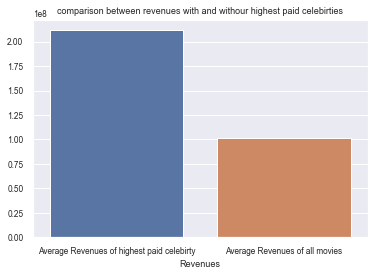

In [51]:
sns.set(font_scale=0.75)
sns.barplot(x=label,y=average).set(title='comparison between revenues with and withour highest paid celebirties',xlabel='Revenues');

hiring most paid actors might incrase movie revenues 

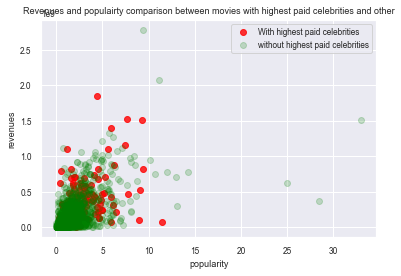

In [58]:
#lets compare the two datasets togther preciesly
fig, ax = plt.subplots()

ax.scatter(new_data['popularity'], new_data["revenue"],color="red", label="With highest paid celebrities",alpha=0.8);
ax.scatter(new_df['popularity'], new_df["revenue"],color="green", label="without highest paid celebrities",alpha=0.2);
ax.set_xlabel('popularity')
ax.set_ylabel('revenues')
ax.set_title('Revenues and populairty comparison between movies with highest paid celebrities and other')
ax.legend();


hiring highest paid actors might help getting more popularity and revenues but it is not the only vital factor as some movies could also get high populairty and revenues without the participation of these celebrities

<a id='conclusions'></a>
## Conclusions
1- Data Limation :
>1- removing null values 
 2- removing zeros 
 3- create a new column to analyze genres better
 4-drop irrlevant data


2- finial conclusions
>whenever Budget, popularity or vote count increase, revenues also have a tendency to increase.
>viewrs prefer science fiction , adventure and animation the most
>animation has the largest revenues compared to the rest 
>hiring higesht paid actors might help increase your revenues but you also need to be sure about the quality of other factors such as storyline
>average vote does not affect revenues. also, you do not have to have big budger in order to have higher average votes
>average vote has declined over time indicating that the quality of movies has declined over years and movie writers need to be more creative 
